<a href="https://colab.research.google.com/github/Aidinferaz/NLP-ITS/blob/main/PBN_Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Preprocessing


In [1]:
import nltk
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import pandas as pd

In [2]:
!pip install -q kaggle
!kaggle datasets download -d atifaliak/youtube-comments-dataset
!unzip -qq youtube-comments-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/atifaliak/youtube-comments-dataset
License(s): DbCL-1.0
 83% 1.00M/1.20M [00:00<00:00, 1.08MB/s]
100% 1.20M/1.20M [00:01<00:00, 1.25MB/s]


In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download("maxent_ne_chunker_tab")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


True

In [4]:
df = pd.read_csv("/content/YoutubeCommentsDataSet.csv")
df.drop("Sentiment", axis=1, inplace=True)
df

,Comment
0,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...
2,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...
4,apple pay is so convenient secure and easy to ...
...,...
18403,i really like the point about engineering tool...
18404,i’ve just started exploring this field and thi...
18405,excelente video con una pregunta filosófica pr...
18406,hey daniel just discovered your channel a coup...


## Case Folding

In [5]:
df['lower_case'] = df['Comment'].str.lower()
df

,Comment,lower_case
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in 2014 require...
1,here in nz 50 of retailers don’t even have con...,here in nz 50 of retailers don’t even have con...
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesn’t take app...
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...
...,...,...
18403,i really like the point about engineering tool...,i really like the point about engineering tool...
18404,i’ve just started exploring this field and thi...,i’ve just started exploring this field and thi...
18405,excelente video con una pregunta filosófica pr...,excelente video con una pregunta filosófica pr...
18406,hey daniel just discovered your channel a coup...,hey daniel just discovered your channel a coup...


## Tokenization

In [6]:
#NLTK
df['tokens_nltk'] = df['lower_case'].astype(str).apply(lambda x: word_tokenize(x))
print("Text:", df['lower_case'][0])
print("Tokenization (NLTK):", df['tokens_nltk'][0])

Text: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased
Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']


In [7]:
#SPACYnn
#python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [8]:
df['tokens_spacy'] = list(nlp.pipe(df['lower_case'].astype(str)))
df['tokens_spacy'] = df['tokens_spacy'].apply(lambda doc: [token.text for token in doc])
print("Text:", df['lower_case'][0])
print("Tokenization (SpaCy):", df['tokens_spacy'][0])

Text: lets not forget that apple pay in 2014 required a brand new iphone in order to use it a significant portion of apples user base wasnt able to use it even if they wanted to as each successive iphone incorporated the technology and older iphones were replaced the number of people who could use the technology increased
Tokenization (SpaCy): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'was', 'nt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']


## Stemming

In [9]:
def stem(tokens_nltk):
    stemmer = PorterStemmer()
    stems = [stemmer.stem(word) for word in tokens_nltk]
    return stems
df['stems_nltk'] = df['tokens_nltk'].apply(lambda x: stem(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stemming:", df['stems_nltk'][0])

df['stems_spacy'] = df['tokens_spacy'].apply(lambda x: stem(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stemming:", df['stems_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Stemming: ['let', 'not', 'forget', 'that', 'appl', 'pay', 'in', '2014', 'requir', 'a', 'brand', 'new', 'iphon', 'in', 'order', 'to', 'use', 'it', 'a', 'signific', 'portion', 'of', 'appl', 'user', 'base', 'wasnt', 'abl', 'to', 'use', 'it', 'even', 'if', 'they', 'want', 'to', 'as', 'each', 'success', 'iphon', 'incorpor', 'the', 'technolog', 'and', 'older', 'iphon', 'were', 'replac', 'the', 'number', 'of', 'peopl', 'who', 'could', 'use', 'the', 'technolog', 'increas']
Tokenization (SpaCy

## Lemmatization

In [10]:
def lemma(tokens_nltk):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(word, pos="v") for word in tokens_nltk]
    return lemmas
df['lemmas_nltk'] = df['tokens_nltk'].apply(lambda x: lemma(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Lemmatization:", df['lemmas_nltk'][0])

df['lemmas_spacy'] = df['tokens_spacy'].apply(lambda x: lemma(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Lemmatization:", df['lemmas_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Lemmatization: ['let', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'require', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'want', 'to', 'as', 'each', 'successive', 'iphone', 'incorporate', 'the', 'technology', 'and', 'older', 'iphones', 'be', 'replace', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'incr

## Remove Stopwords

In [11]:
def stop_w(tokens_nltk):
    stop_words = set(stopwords.words("english"))
    tokens_filtered = [word for word in tokens_nltk if word.lower() not in stop_words]
    return tokens_filtered
df['remove_stop_words_nltk'] = df['tokens_nltk'].apply(lambda x: stop_w(x))
print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Stopword Removal:", df['remove_stop_words_nltk'][0])

df['remove_stop_words_spacy'] = df['tokens_spacy'].apply(lambda x: stop_w(x))
print("Tokenization (SpaCy):", df['tokens_spacy'][0])
print("Stopword Removal:", df['remove_stop_words_spacy'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Stopword Removal: ['lets', 'forget', 'apple', 'pay', '2014', 'required', 'brand', 'new', 'iphone', 'order', 'use', 'significant', 'portion', 'apples', 'user', 'base', 'wasnt', 'able', 'use', 'even', 'wanted', 'successive', 'iphone', 'incorporated', 'technology', 'older', 'iphones', 'replaced', 'number', 'people', 'could', 'use', 'technology', 'increased']
Tokenization (SpaCy): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'i

## Word Cloud

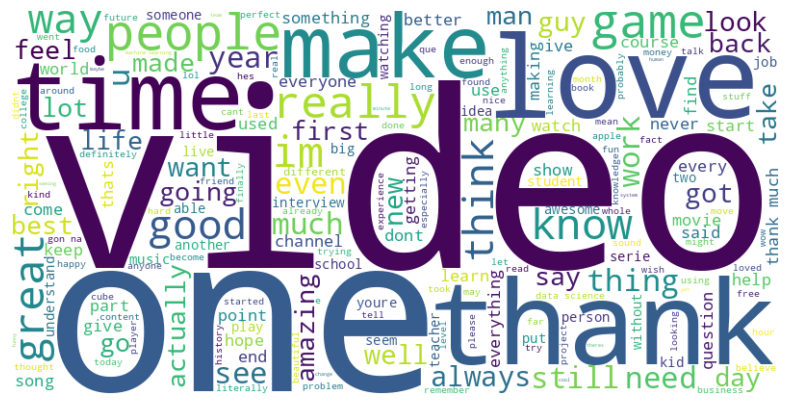

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_nltk']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


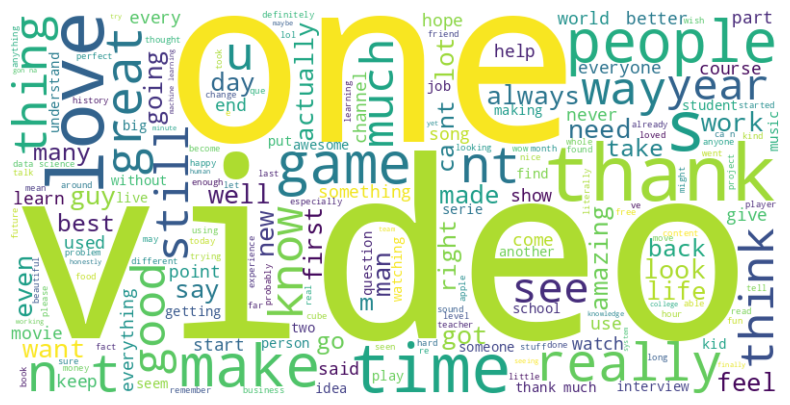

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = " ".join([" ".join(words) for words in df['remove_stop_words_spacy']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Tugas Tambahan

## Pos Tagging

POS Tag merupakan suatu cara pengkatogorian kelas kata, seperti kata benda, kata kerja, kata sifat, dll. POS Tagger merupakan sebuah aplikasi yang mampu melakukan proses anotasi part-of-speech tag untuk setiap kata di dalam dokumen secara otomatis.

In [14]:
def pos_tagger(tokens_nltk):
    return pos_tag(tokens_nltk)

df['pos_tags_nltk'] = df['tokens_nltk'].apply(lambda x: pos_tagger(x))

print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("POS Tagging:", df['pos_tags_nltk'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
POS Tagging: [('lets', 'NNS'), ('not', 'RB'), ('forget', 'VB'), ('that', 'IN'), ('apple', 'NN'), ('pay', 'NN'), ('in', 'IN'), ('2014', 'CD'), ('required', 'VBD'), ('a', 'DT'), ('brand', 'NN'), ('new', 'JJ'), ('iphone', 'NN'), ('in', 'IN'), ('order', 'NN'), ('to', 'TO'), ('use', 'VB'), ('it', 'PRP'), ('a', 'DT'), ('significant', 'JJ'), ('portion', 'NN'), ('of', 'IN'), ('apples', 'NNS'), ('user', 'JJ'), ('base', 'NN'), ('wasnt', 'NN'), ('able', 'JJ'), ('to', 'TO'), ('use', 'VB'), ('it',

## Named Entity Recognition

"Named Entity Recognition (NER) is a key technique in Natural Language Processing (NLP) that focuses on identifying and classifying specific entities from unstructured text. These entities can be names of people, organizations, locations, dates, and more. NER converts raw data into structured information, making it easier for machines to process and understand.

It operates by first detecting potential entities and then categorizing them into predefined groups. NER is widely used in applications such as search engines, chatbots, and information retrieval systems, helping to extract actionable insights from vast volumes of text."

-Medium

In [18]:
df.head()

,Comment,lower_case,tokens_nltk,tokens_spacy,stems_nltk,stems_spacy,lemmas_nltk,lemmas_spacy,remove_stop_words_nltk,remove_stop_words_spacy,pos_tags_nltk
0,lets not forget that apple pay in 2014 require...,lets not forget that apple pay in 2014 require...,"[lets, not, forget, that, apple, pay, in, 2014...","[lets, not, forget, that, apple, pay, in, 2014...","[let, not, forget, that, appl, pay, in, 2014, ...","[let, not, forget, that, appl, pay, in, 2014, ...","[let, not, forget, that, apple, pay, in, 2014,...","[let, not, forget, that, apple, pay, in, 2014,...","[lets, forget, apple, pay, 2014, required, bra...","[lets, forget, apple, pay, 2014, required, bra...","[(lets, NNS), (not, RB), (forget, VB), (that, ..."
1,here in nz 50 of retailers don’t even have con...,here in nz 50 of retailers don’t even have con...,"[here, in, nz, 50, of, retailers, don, ’, t, e...","[here, in, nz, 50, of, retailers, do, n’t, eve...","[here, in, nz, 50, of, retail, don, ’, t, even...","[here, in, nz, 50, of, retail, do, n’t, even, ...","[here, in, nz, 50, of, retailers, don, ’, t, e...","[here, in, nz, 50, of, retailers, do, n’t, eve...","[nz, 50, retailers, ’, even, contactless, cred...","[nz, 50, retailers, n’t, even, contactless, cr...","[(here, RB), (in, IN), (nz, JJ), (50, CD), (of..."
2,i will forever acknowledge this channel with t...,i will forever acknowledge this channel with t...,"[i, will, forever, acknowledge, this, channel,...","[i, will, forever, acknowledge, this, channel,...","[i, will, forev, acknowledg, thi, channel, wit...","[i, will, forev, acknowledg, thi, channel, wit...","[i, will, forever, acknowledge, this, channel,...","[i, will, forever, acknowledge, this, channel,...","[forever, acknowledge, channel, help, lessons,...","[forever, acknowledge, channel, help, lessons,...","[(i, NN), (will, MD), (forever, VB), (acknowle..."
3,whenever i go to a place that doesn’t take app...,whenever i go to a place that doesn’t take app...,"[whenever, i, go, to, a, place, that, doesn, ’...","[whenever, i, go, to, a, place, that, does, n’...","[whenev, i, go, to, a, place, that, doesn, ’, ...","[whenev, i, go, to, a, place, that, doe, n’t, ...","[whenever, i, go, to, a, place, that, doesn, ’...","[whenever, i, go, to, a, place, that, do, n’t,...","[whenever, go, place, ’, take, apple, pay, ’, ...","[whenever, go, place, n’t, take, apple, pay, n...","[(whenever, NN), (i, NN), (go, VBP), (to, TO),..."
4,apple pay is so convenient secure and easy to ...,apple pay is so convenient secure and easy to ...,"[apple, pay, is, so, convenient, secure, and, ...","[apple, pay, is, so, convenient, secure, and, ...","[appl, pay, is, so, conveni, secur, and, easi,...","[appl, pay, is, so, conveni, secur, and, easi,...","[apple, pay, be, so, convenient, secure, and, ...","[apple, pay, be, so, convenient, secure, and, ...","[apple, pay, convenient, secure, easy, use, us...","[apple, pay, convenient, secure, easy, use, us...","[(apple, NN), (pay, NN), (is, VBZ), (so, RB), ..."


In [20]:
df["processed_text"] = df["tokens_nltk"].apply(lambda x: " ".join(x))

def ner_spacy(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df['ner_spacy'] = df['processed_text'].apply(ner_spacy)

print("NER Output:", df['ner_spacy'][0])

NER Output: [('2014', 'DATE')]


## Dependency Parsing

"to figure out how all the words in our sentence relate to each other. This is called dependency parsing."

-Medium

In [21]:
def dependency_parser(tokens_nltk):
    sentence = " ".join(tokens_nltk)
    doc = nlp(sentence)
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    return dependencies

df['dependency_parsing'] = df['tokens_nltk'].apply(lambda x: dependency_parser(x))

print("Tokenization (NLTK):", df['tokens_nltk'][0])
print("Dependency Parsing:", df['dependency_parsing'][0])

Tokenization (NLTK): ['lets', 'not', 'forget', 'that', 'apple', 'pay', 'in', '2014', 'required', 'a', 'brand', 'new', 'iphone', 'in', 'order', 'to', 'use', 'it', 'a', 'significant', 'portion', 'of', 'apples', 'user', 'base', 'wasnt', 'able', 'to', 'use', 'it', 'even', 'if', 'they', 'wanted', 'to', 'as', 'each', 'successive', 'iphone', 'incorporated', 'the', 'technology', 'and', 'older', 'iphones', 'were', 'replaced', 'the', 'number', 'of', 'people', 'who', 'could', 'use', 'the', 'technology', 'increased']
Dependency Parsing: [('lets', 'aux', 'forget'), ('not', 'neg', 'forget'), ('forget', 'ROOT', 'forget'), ('that', 'mark', 'pay'), ('apple', 'compound', 'pay'), ('pay', 'ccomp', 'forget'), ('in', 'prep', 'pay'), ('2014', 'pobj', 'in'), ('required', 'ccomp', 'forget'), ('a', 'det', 'iphone'), ('brand', 'npadvmod', 'new'), ('new', 'amod', 'iphone'), ('iphone', 'dobj', 'required'), ('in', 'prep', 'required'), ('order', 'pobj', 'in'), ('to', 'aux', 'use'), ('use', 'acl', 'order'), ('it', 'd